<a href="https://colab.research.google.com/github/mohammadmasqala/Prediction-of-Product-Sale/blob/main/Prediction_of_Product_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sale

- Author: Mohammad Masqala


## Project Overview


## Load and Inspect Data


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
fpath = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales = pd.read_csv(fpath)


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


In [ ]:
len(df_sales)

8523

In [ ]:
len(df_sales.columns)

12

In [ ]:
# Find datatypes of each column
df_sales.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
duplicated_rows = df_sales.duplicated(keep=False)
duplicated_rows.sum()

np.int64(0)

In [ ]:
# Check for how many unique values are in each column
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [ ]:
df_sales.nunique() / len(df_sales) * 100

,0
Item_Identifier,18.291681
Item_Weight,4.869178
Item_Fat_Content,0.058665
Item_Visibility,92.455708
Item_Type,0.187727
Item_MRP,69.670304
Outlet_Identifier,0.117330
Outlet_Establishment_Year,0.105597
Outlet_Size,0.035199
Outlet_Location_Type,0.035199


In [ ]:
null_sums = df_sales.isna().sum()
null_sums

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# Saving list of column names for object cols
obj_cols = df_sales.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Saving list of column names for numeric cols
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# Checking which categorical columns had missing values.
df_sales[obj_cols].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# Using the list of obj_cols to fillna
df_sales[obj_cols] = df_sales[obj_cols].fillna("MISSING")

In [ ]:
# Confirm that all null values have been filled for categorical columns
df_sales[obj_cols].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# Checking which numeric columns had missing values.
df_sales[num_cols].isna().sum()

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
# Using the list of num_cols to fillna with -1
df_sales[num_cols] = df_sales[num_cols].fillna(-1)

In [ ]:
# Confirm that all null values have been filled for numeric columns
df_sales[num_cols].isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
# Obtain the value counts for all string columns
for col in obj_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [ ]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# Standardize the values in the 'Item_Fat_Content' column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat', 'reg' :'Regular'})
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
# Check the summary stats for the df_sales
df_sales.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0,8523.0,8523.0,8523.0,8523.0
mean,10.0,0.0,141.0,1998.0,2181.0
std,7.0,0.0,62.0,8.0,1706.0
min,-1.0,0.0,31.0,1985.0,33.0
25%,7.0,0.0,94.0,1987.0,834.0
50%,11.0,0.0,143.0,1999.0,1794.0
75%,16.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# df=df_sales.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()
# df

## Exploratory Data Analysis


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# fig, axes = plt.subplots( figsize=(10,5))
# ax=sns.barplot(data= df_sales, x="Outlet_Location_Type",y='Item_Outlet_Sales' ,hue='Outlet_Identifier', width=.5 )
# ax.set_title("Comparing the Outlet Sales Based on outlet and outlet location type ")
# fig, axes = plt.subplots( figsize=(10,5))
# ax=sns.barplot(data= df_sales, x="Outlet_Type",y='Item_Outlet_Sales' ,hue='Outlet_Identifier', width=.5 )
# ax.set_title("Comparing the Outlet Sales Based on outlet and outlet type ")
# fig, axes = plt.subplots( figsize=(8,5))
# ax=sns.barplot(data= df_sales, x="Outlet_Location_Type",y='Item_Outlet_Sales' ,hue='Outlet_Type', width=.5 )
# ax.set_title("Comparing the Outlet Sales Based on outlet and outlet location type ")
# fig, axes = plt.subplots( figsize=(7,5))
# ax=sns.barplot(data= df_sales, x="Outlet_Size",y='Item_Outlet_Sales' ,hue='Outlet_Type')
# plt.legend(loc='upper center')
# ax.set_title("Comparing the Outlet Sales Based on outlet and outlet location type ")

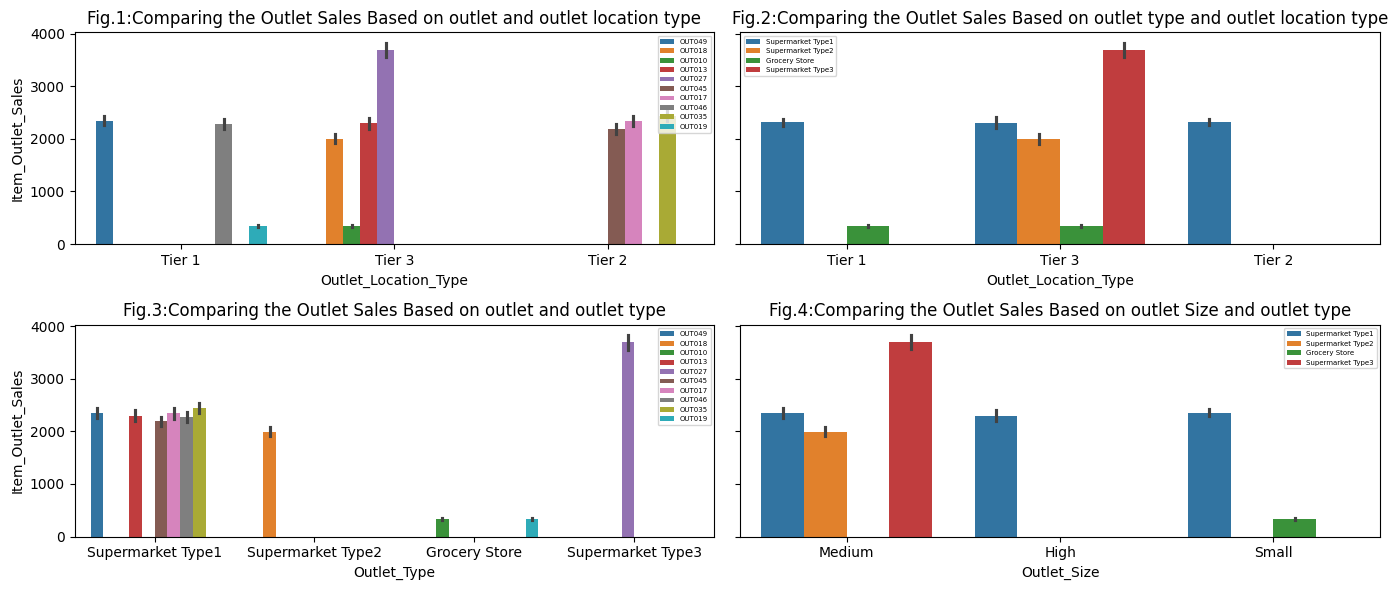

In [ ]:
fig, axes = plt.subplots(ncols=2 , nrows=2, sharey=True, figsize=(14,6))

# Comparing the Outlet Sales Based on outlet and outlet location type
sns.barplot(data=df_sales, x="Outlet_Location_Type", y='Item_Outlet_Sales', hue='Outlet_Identifier',ax=axes[0,0])
axes[0,0].legend(fontsize="5", loc='upper right')
axes[0,0].set_title('Fig.1:Comparing the Outlet Sales Based on outlet and outlet location type', fontsize = 12);

# Comparing the Outlet Sales Based on outlet type and outlet location type
sns.barplot(data=df_sales, x="Outlet_Location_Type", y='Item_Outlet_Sales', hue='Outlet_Type',ax=axes[0,1])
axes[0,1].legend(fontsize="5", loc='upper left')
axes[0,1].set_title('Fig.2:Comparing the Outlet Sales Based on outlet type and outlet location type', fontsize = 12);

# Comparing the Outlet Sales Based on outlet and outlet type
sns.barplot(data=df_sales, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Identifier',ax=axes[1,0])
axes[1,0].legend(fontsize="5", loc='upper right')
axes[1,0].set_title('Fig.3:Comparing the Outlet Sales Based on outlet and outlet type', fontsize = 12);

# Comparing the Outlet Sales Based on outlet Size and outlet type
sns.barplot(data=df_sales, x="Outlet_Size", y='Item_Outlet_Sales', hue='Outlet_Type',ax=axes[1,1])
axes[1,1].legend(fontsize="5", loc='upper right')
axes[1,1].set_title('Fig.4:Comparing the Outlet Sales Based on outlet Size and outlet type', fontsize = 12);

fig.tight_layout()


We can see in figure 1 that outlet Tier3 location has the most sales because of OUT027 which has the most sales between the outlets because it is Supermarket type 3 while grocery stores are the lowest sales as we see in figure 3, and we conclude in figures 2 and 4 that the sales are depends to the outlet type regardless the location type and the size


In [ ]:
# df2=df_sales.groupby('Item_Identifier')['Outlet_Identifier'].value_counts().unstack()
# df2

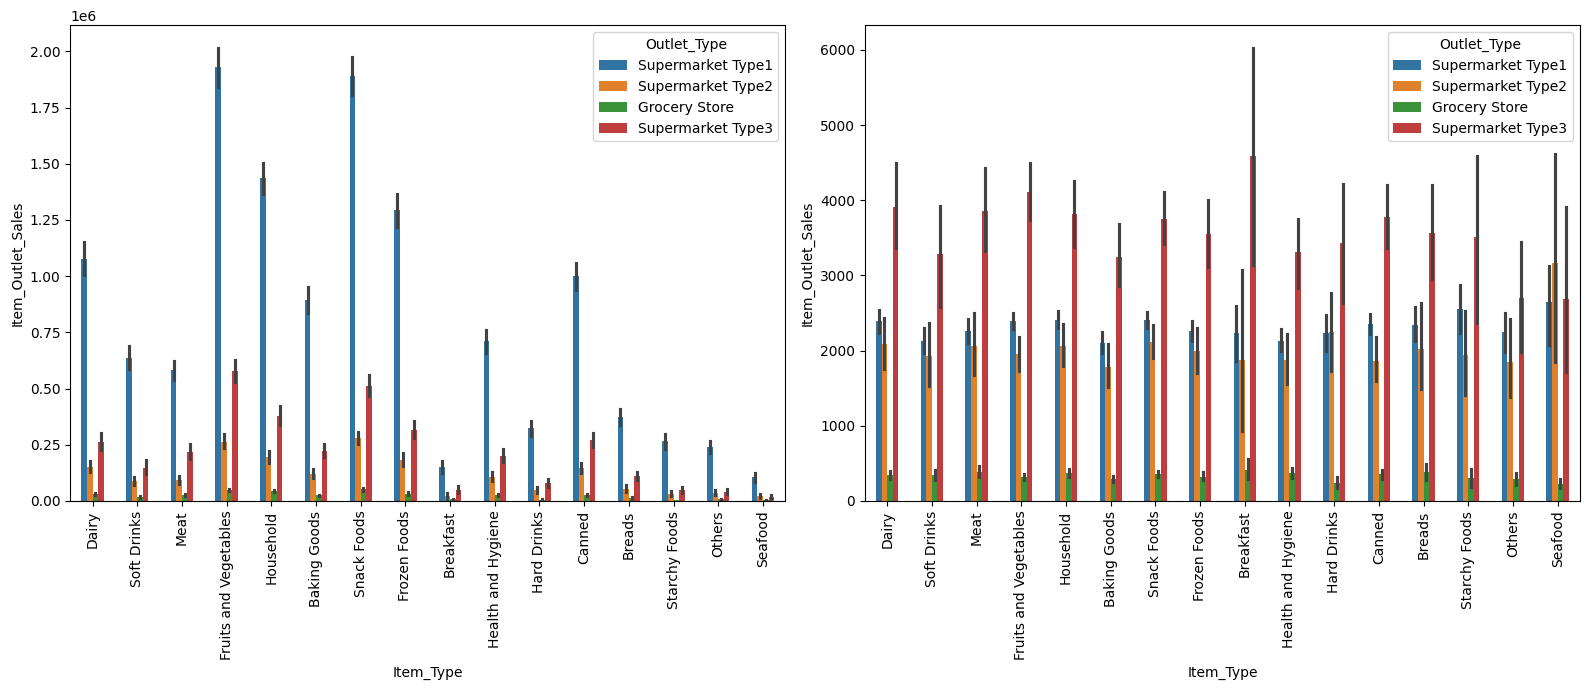

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(16,7))
# Plot the barplot for the sum of outlet sales on the left
sns.barplot(data= df_sales, x="Item_Type",y='Item_Outlet_Sales', width=.5 ,estimator='sum',hue='Outlet_Type', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Plot the barplot for the mean of the outlet sales on the right
sns.barplot(data= df_sales, x="Item_Type",y='Item_Outlet_Sales', width=.5 ,hue='Outlet_Type', ax=axes[1] )
axes[1].tick_params(axis='x', rotation=90)


fig.tight_layout()



We noticed that the mean of sales for super market type 3 is the highest one but the sum of the sales for super market type one is higher and this because there are 4 supermarket type 1 and only 1 supermarket type 3

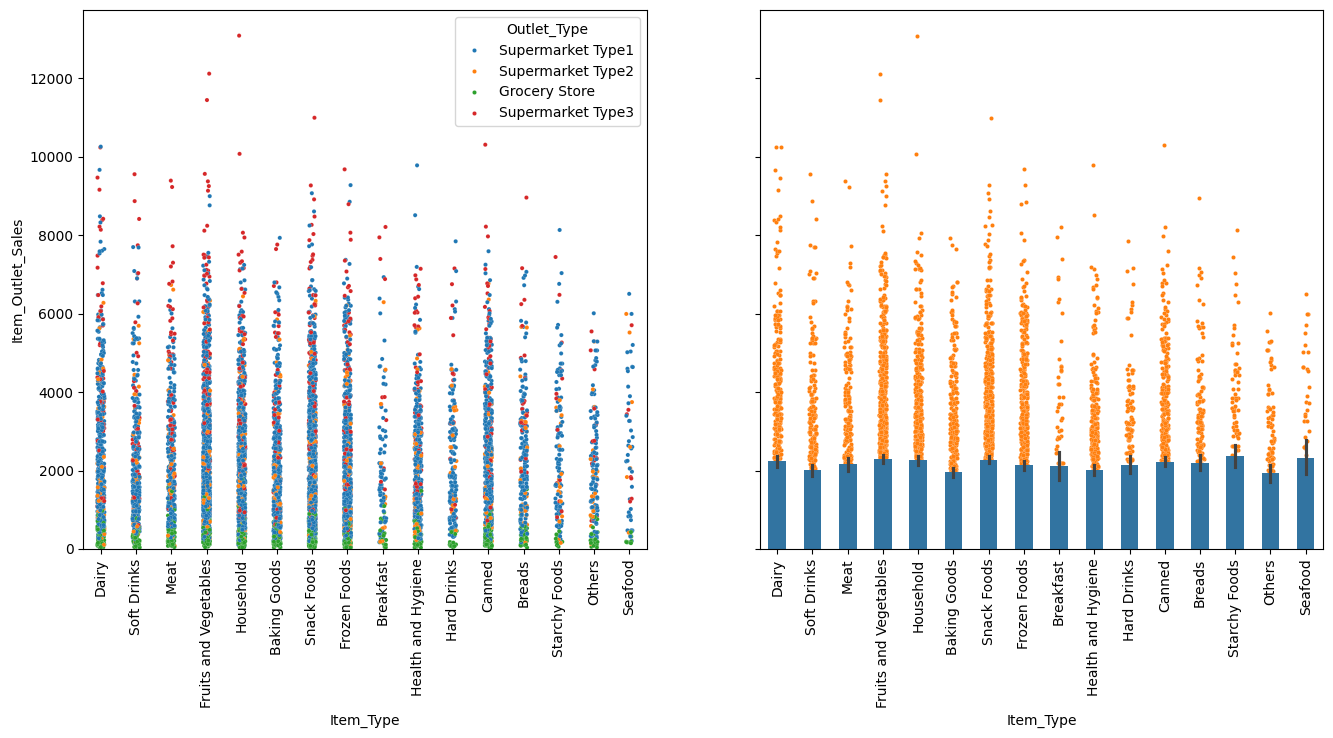

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16,7))
# Plot the barplot for the sum of outlet sales on the left
sns.stripplot(data=df_sales, x="Item_Type", y='Item_Outlet_Sales',hue='Outlet_Type', edgecolor='white', linewidth=0.1, size=3,zorder=0, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Plot the barplot for the mean of the outlet sales on the right
sns.barplot(data= df_sales, x="Item_Type",y='Item_Outlet_Sales', width=.5 , ax=axes[1] )
sns.stripplot(data=df_sales, x="Item_Type", y='Item_Outlet_Sales',  edgecolor='white', linewidth=0.1, size=3,zorder=0, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)


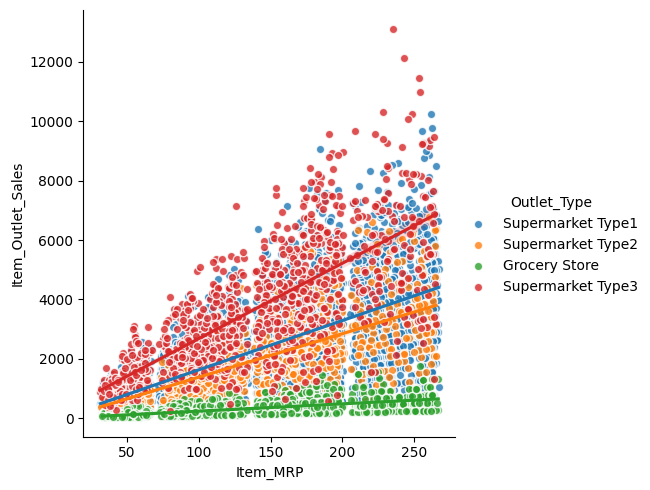

In [ ]:
scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
sns.lmplot(data=df_sales,x='Item_MRP', y='Item_Outlet_Sales',hue='Outlet_Type',scatter_kws=scatter_kws)

## Feature Inspection

In [ ]:
# Replace MISSING with null Nan for ML
df_sales[obj_cols] = df_sales[obj_cols].replace('MISSING', np.nan)
# Check value counts
df_sales[obj_cols].value_counts(dropna=False)
df_sales[obj_cols].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# Replace -1 with null Nan for ML
df_sales[num_cols] = df_sales[num_cols].replace(-1, np.nan)
# Check value counts
df_sales[num_cols].value_counts(dropna=False)
df_sales[num_cols].isna().sum()

,0
Item_Weight,1463
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


### EDA Functions

In [ ]:
#UNIVARIATE PLOTTING FUNCTIONS FOR EDA
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):


  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Stripplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4), ):

  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
df_sales.nunique()

,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,2
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


- Define your target column:
  - Item_Outlet_Sales

### Item_Weight
   Weight of product


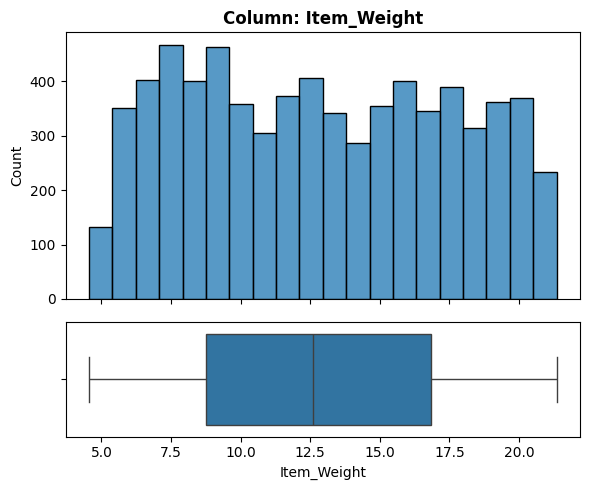

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [ ]:
explore_numeric(df_sales, "Item_Weight", figsize=(6,5) )

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with _______.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - _________.

6. Is there a business case/understanding reason to exclude based on our business case?
  - _________.

  Does this feature appear to be a predictor of the target?


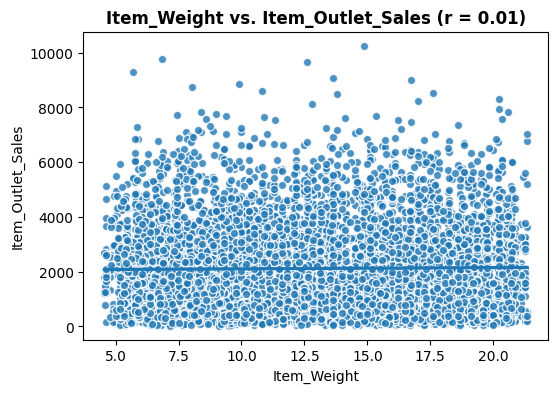

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df_sales, x='Item_Weight', y='Item_Outlet_Sales',figsize=(6,4), )

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, as we can see that there is no relationship between them.
  - Does this feature appear to be a predictor of the target?
    - No, ___________!

In [ ]:
wegit_nan_filter=df_sales['Item_Weight'].isna()

In [ ]:
wegit_nan_filter

,Item_Weight
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
df_filtered = df_sales[wegit_nan_filter]
df_filtered

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
